## Surprise Housing Case Study

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

## Business Problem:

The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:**
-  Which variables are significant in predicting the price of a house, and
-  How well those variables describe the price of a house.

## Business Objective :

It is required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#importing required libraries

import sys
import os
import pandas as pd , numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

# Changing default display options for better visibility of data
#pd.options.display.max_colwidth = 255
#pd.options.display.max_rows=225

G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'NumPy version: 1.16.5 | Pandas version: 1.0.5 | Seaborn version: 0.9.0'

### Step1: Importing the dataframe

In [2]:
housing=pd.read_csv('train.csv')

### Step2:Inspecting the dataframe

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step3: Data Preparation and Exploratory Data analysis

In [7]:
# check for percentage of  missing values in each column

missing=round(100*(housing.isnull().sum()/len(housing.index)),2)
print(missing)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64


In [8]:
# list of columns with atleast one missing values
housing.columns[housing.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
#Checking for columns with more than 40% of missing values
housing.columns[missing>10]

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
housing=housing.drop(columns=['LotFrontage','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)

In [11]:
housing.shape

(1460, 75)

In [12]:
round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending=False).head(18)

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageCond      5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
RoofMatl        0.00
RoofStyle       0.00
SalePrice       0.00
Exterior1st     0.00
Exterior2nd     0.00
dtype: float64

In [13]:
#Check number of unique values in each columns
housing.nunique().sort_values(ascending=False)

Id            1460
LotArea       1073
GrLivArea      861
BsmtUnfSF      780
1stFlrSF       753
              ... 
HalfBath         3
PavedDrive       3
CentralAir       2
Utilities        2
Street           2
Length: 75, dtype: int64

In [14]:
#Drop the Id column as unique for all
housing=housing.drop('Id',axis=1)

In [15]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
housing.dropna(axis='rows', inplace=True)
# Checking for percentage of missing values per column
print(housing.shape)
print(((housing.isnull().sum()/housing.shape[0])*100).round(2))

(1338, 74)
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64


In [16]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
housing['DiffYearBuilt'] = pd.datetime.now().year - housing['YearBuilt']
housing['DiffYearRemodAdd'] = pd.datetime.now().year - housing['YearRemodAdd']
housing['DiffGarageYrBlt'] = pd.datetime.now().year - housing['GarageYrBlt']

In [17]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.

# OUTCOME COLUMN:
out_col = 'SalePrice'

# NUMERICAL COLUMNS: 

# all numeric (float and int) variables in the dataset
#housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
#housing_numeric.head()

num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
print(len(num_col))

# CATEGORICAL COLUMNS: 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(cat_col))

# Listing distinct variables for each Categorical columns to address issues if any
for col in cat_col:
    print(col,' : ',housing[col].unique())

30
43
MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 

In [18]:
#drop YearBuilt, YearRemodAdd, GarageYrBlt
housing=housing.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'],axis=1)

In [19]:
housing.shape

(1338, 74)


**Summary:**

1. There are 1338 rows and 74 columns in cleaned dataframe
2. These 74 columns comprises of both dimensions (categorical value) and measures (numeric value)
3. There are 30 numeric columns, 43 categorical columns and 1 output column

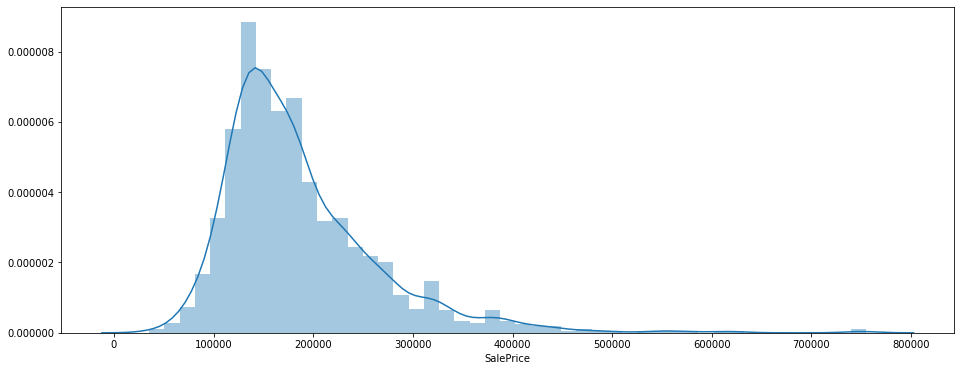

In [20]:
#Lets check our target variable before scaling and splitting
plt.figure(figsize=(16,6))
sns.distplot(housing.SalePrice)
plt.show()

In [21]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=housing[[col_i,col_o]])

In [22]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = housing[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = housing[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=housing[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

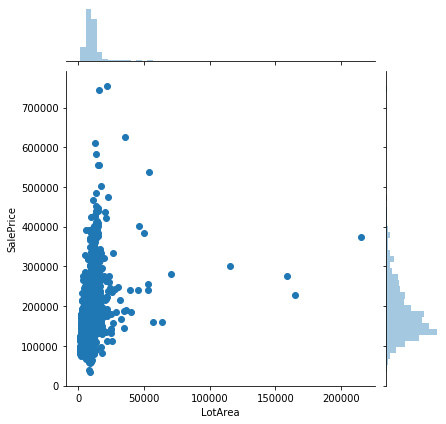

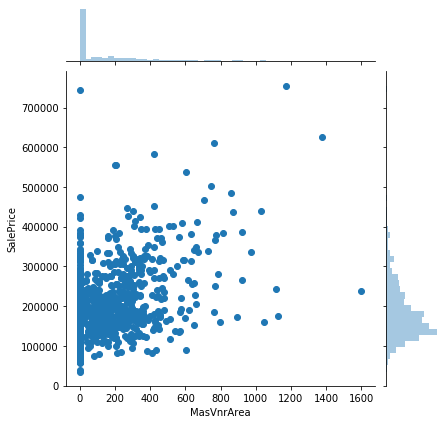

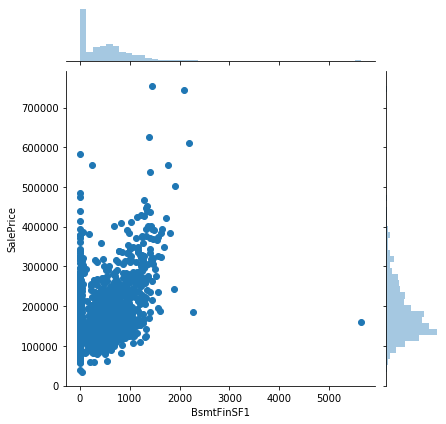

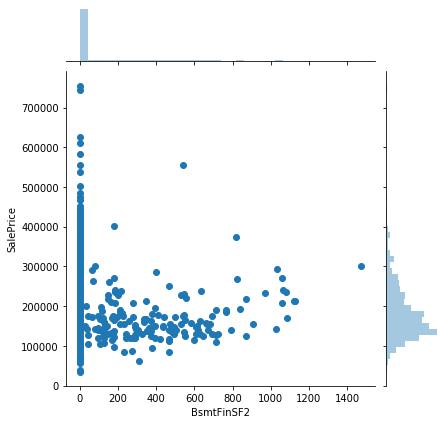

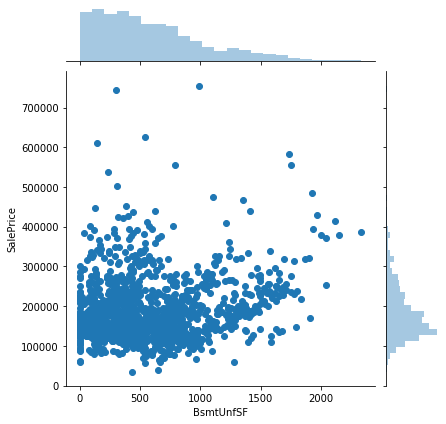

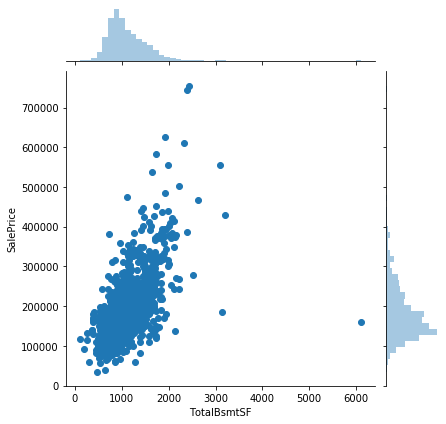

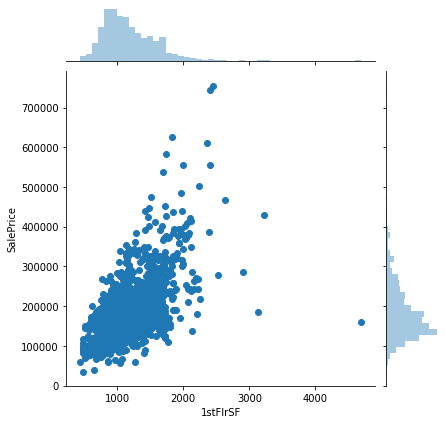

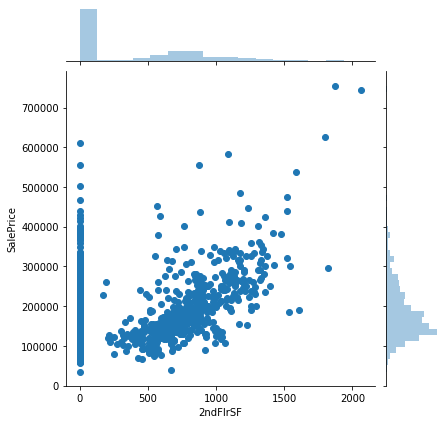

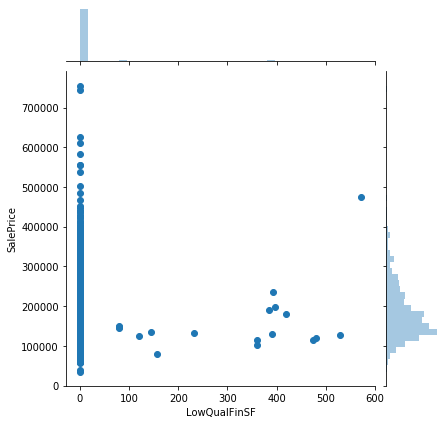

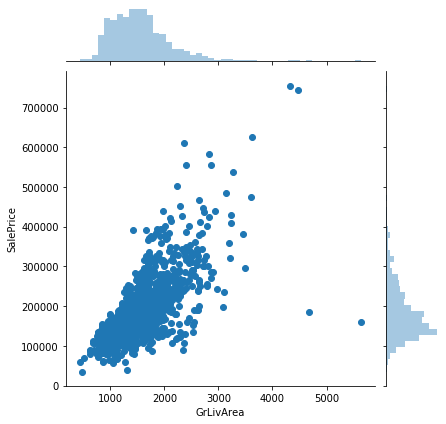

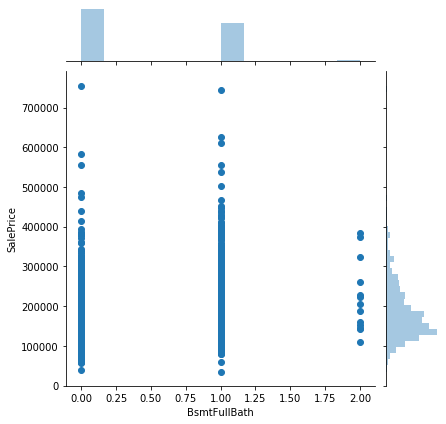

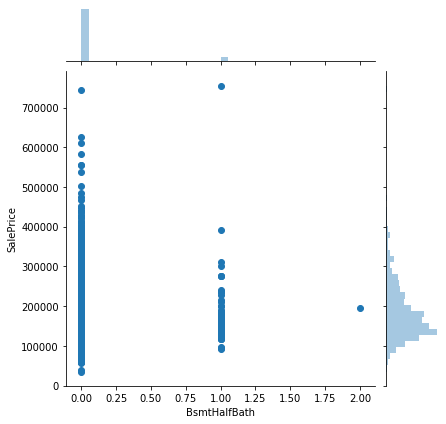

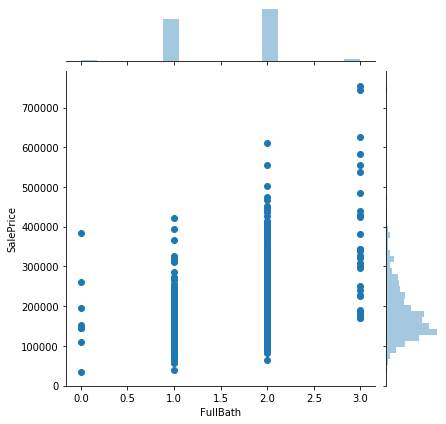

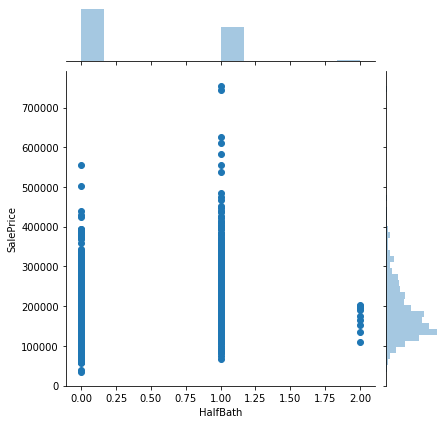

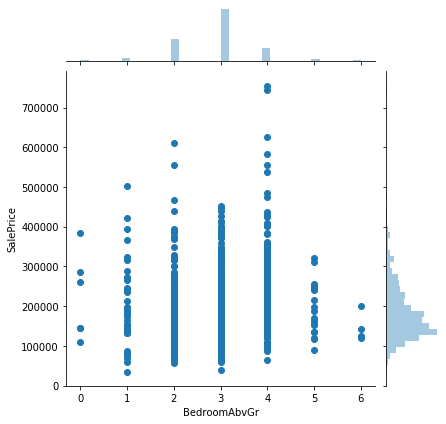

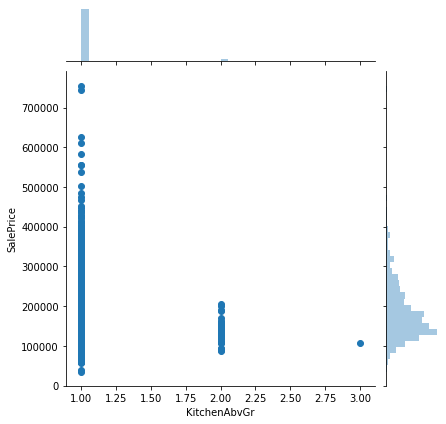

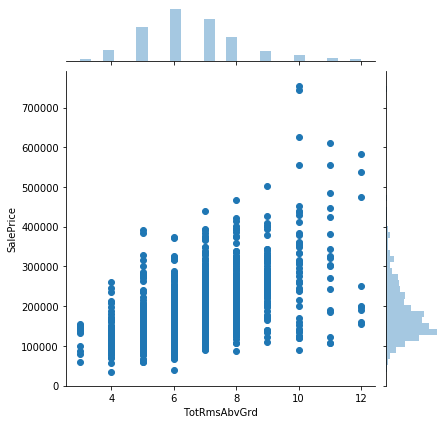

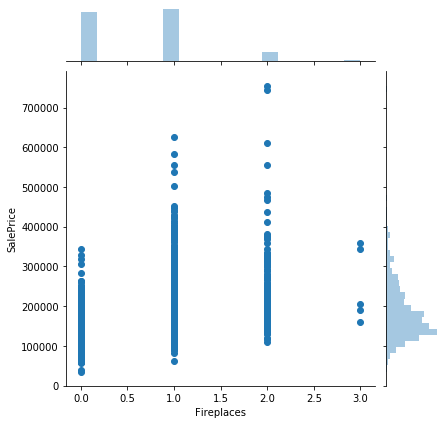

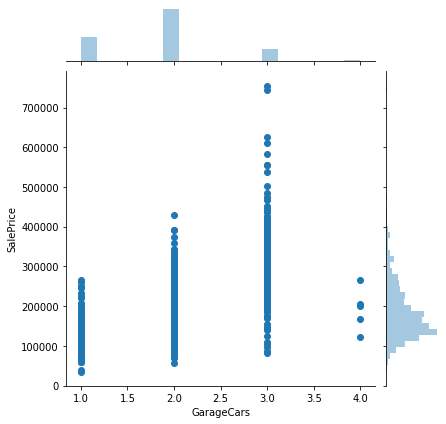

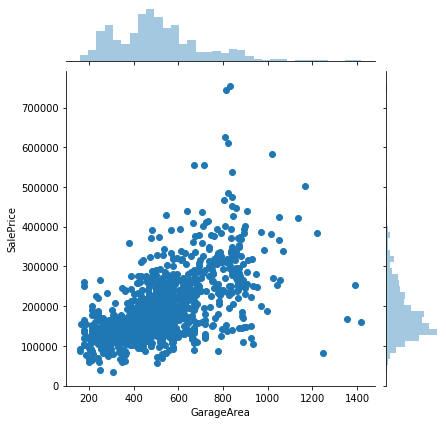

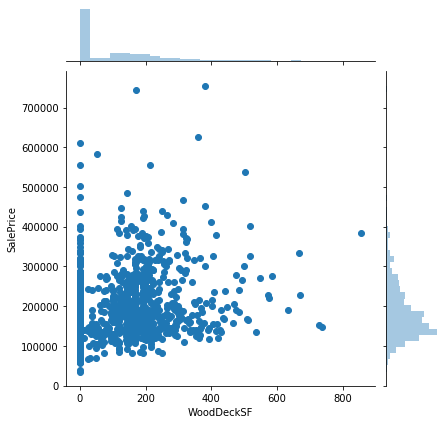

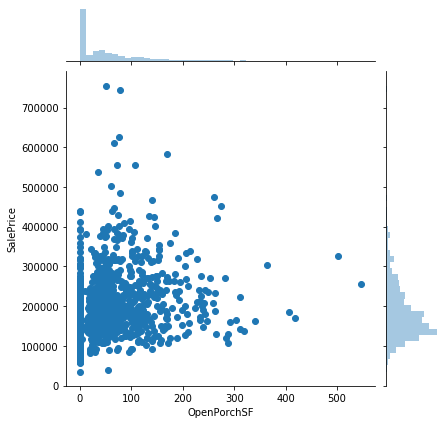

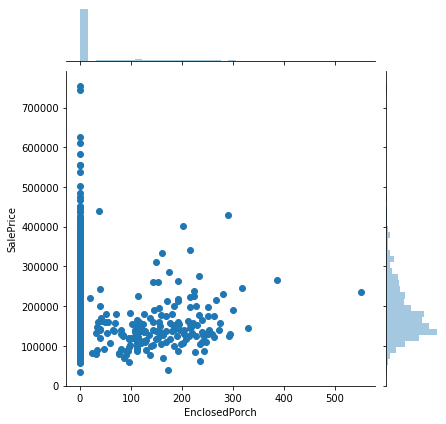

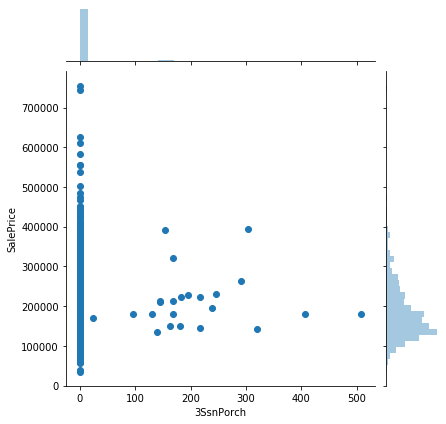

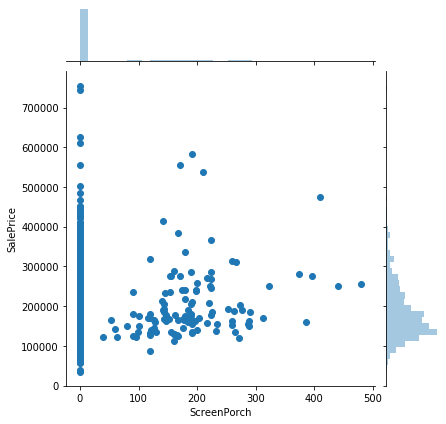

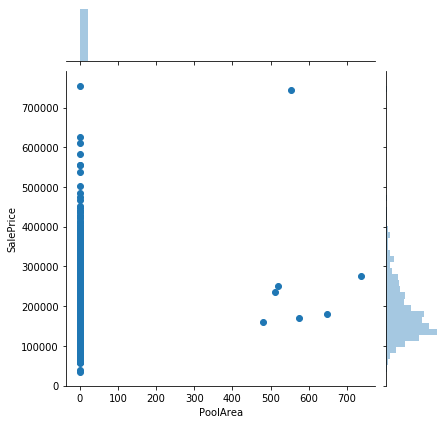

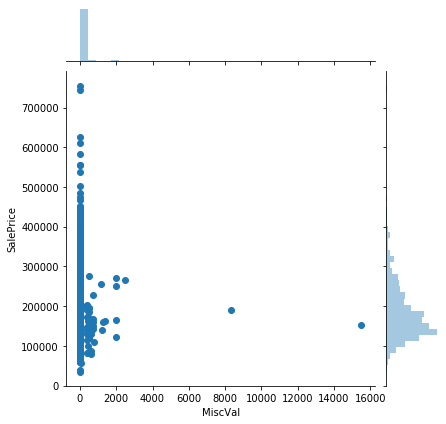

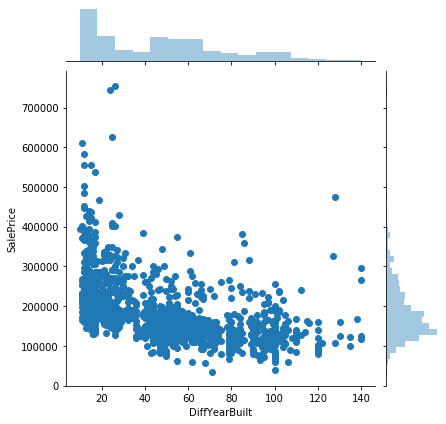

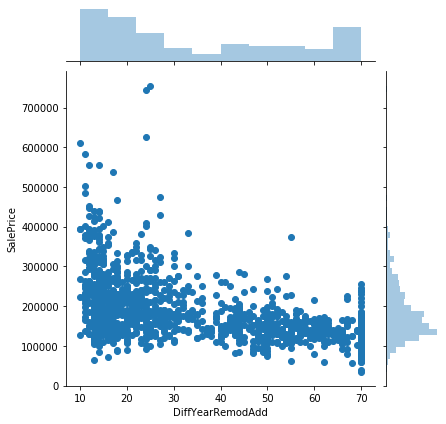

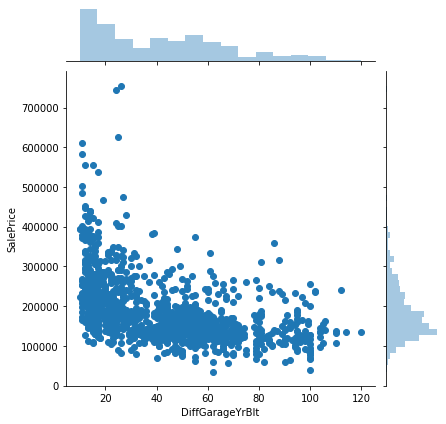

In [23]:
# Numerical column analysis
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)

<Figure size 432x288 with 0 Axes>

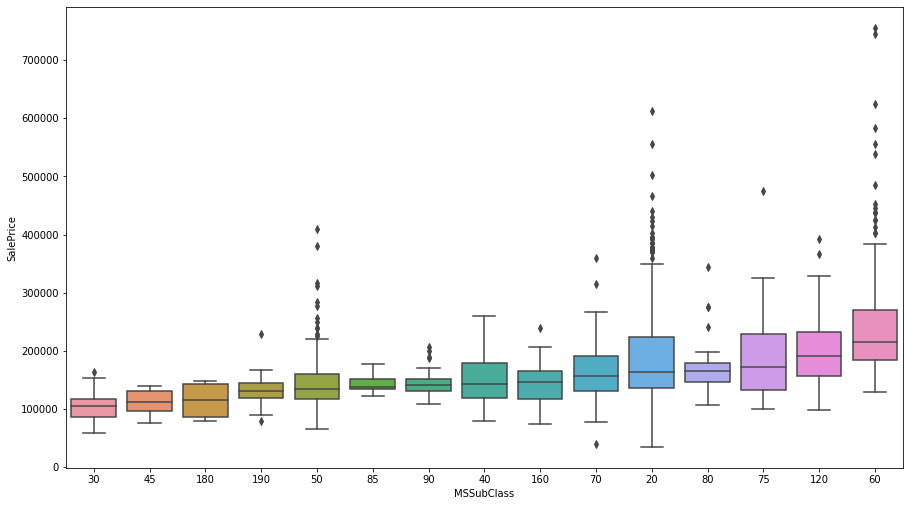

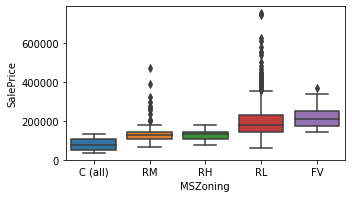

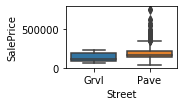

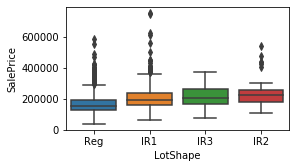

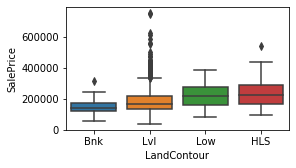

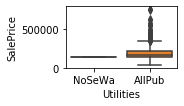

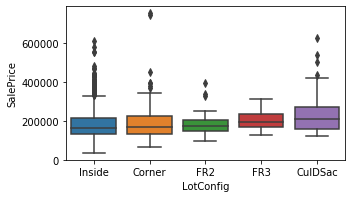

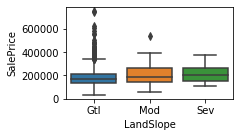

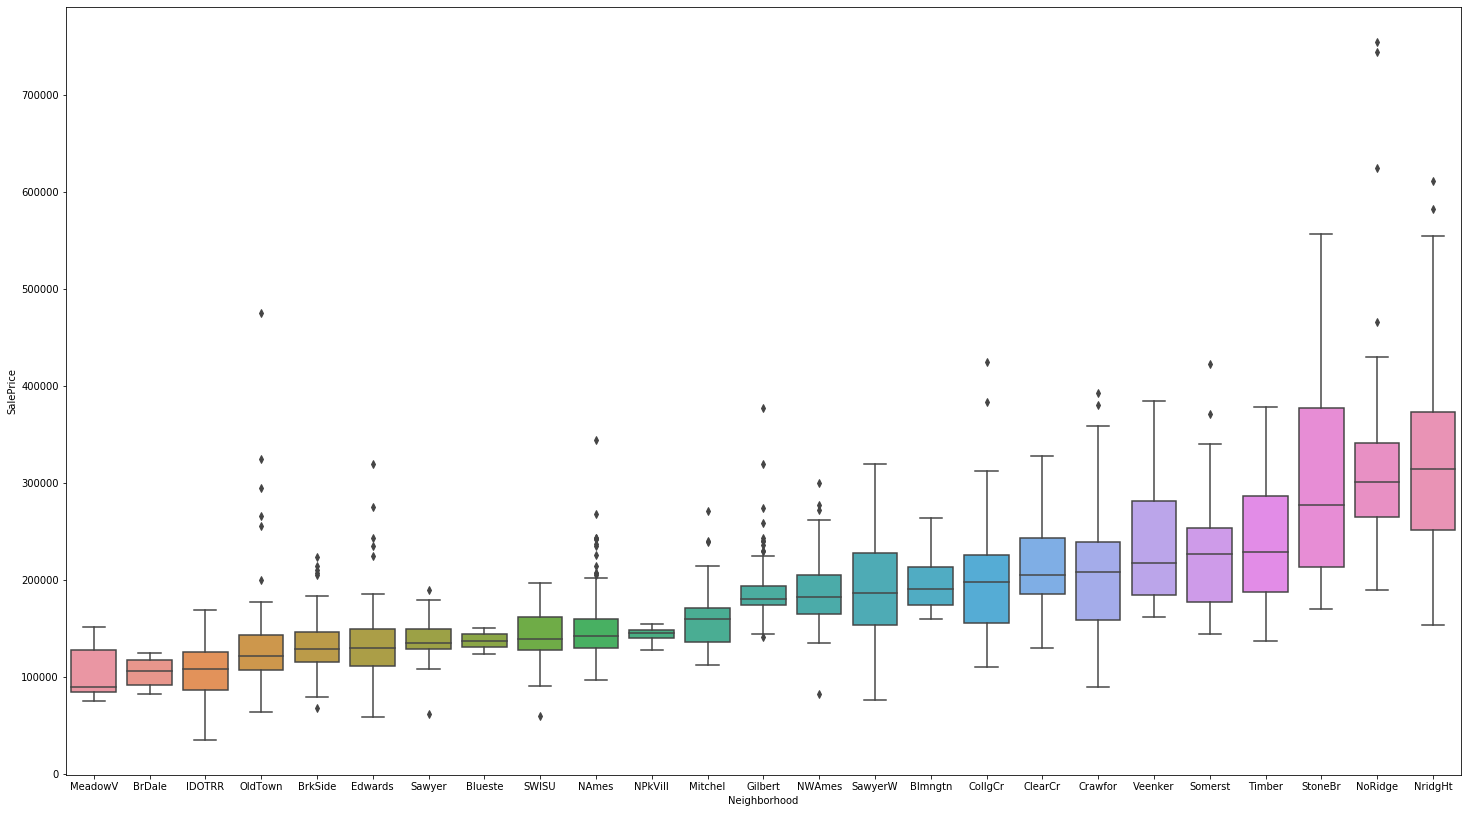

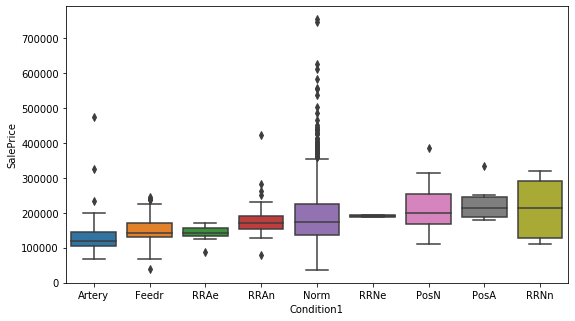

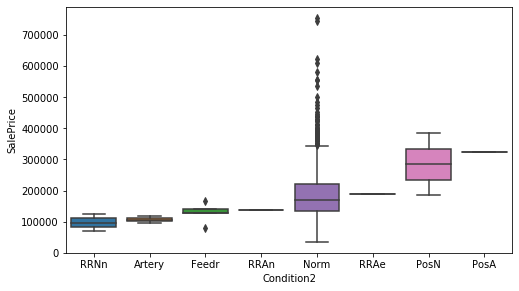

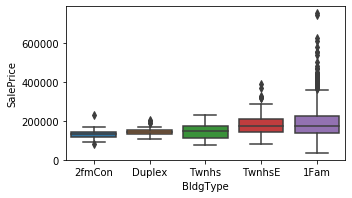

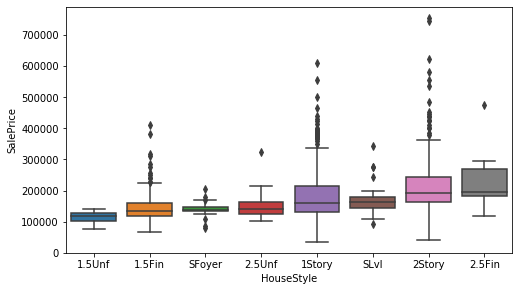

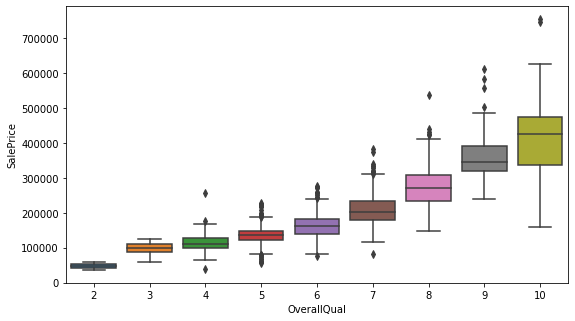

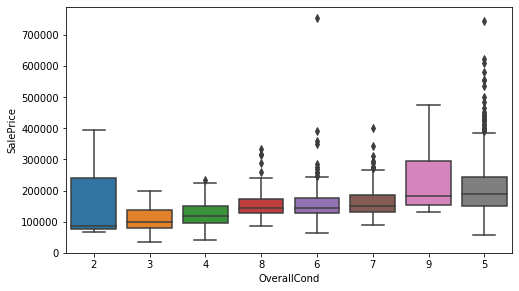

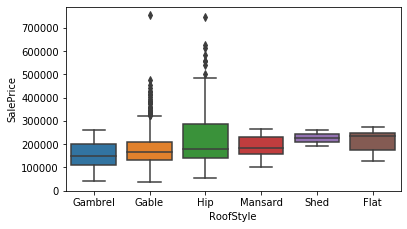

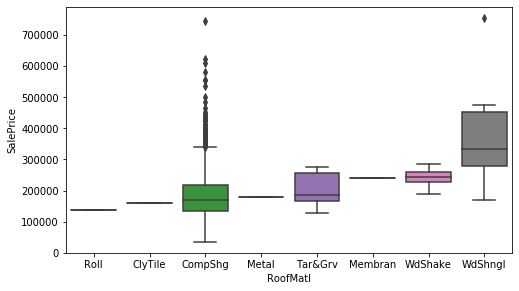

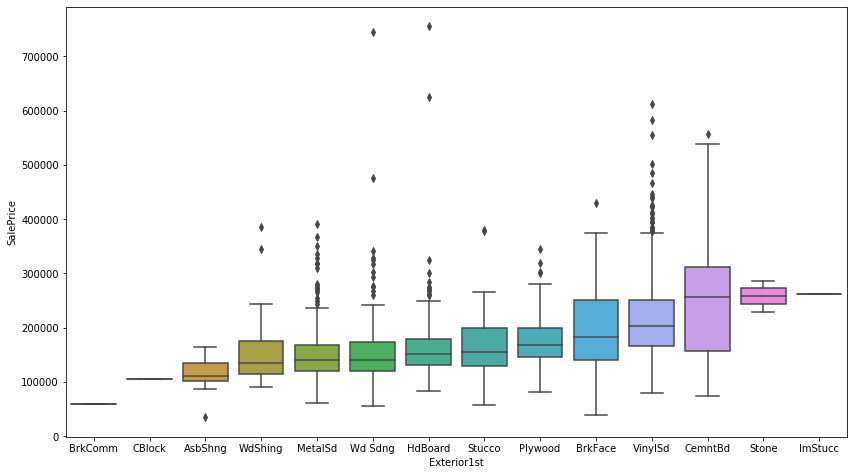

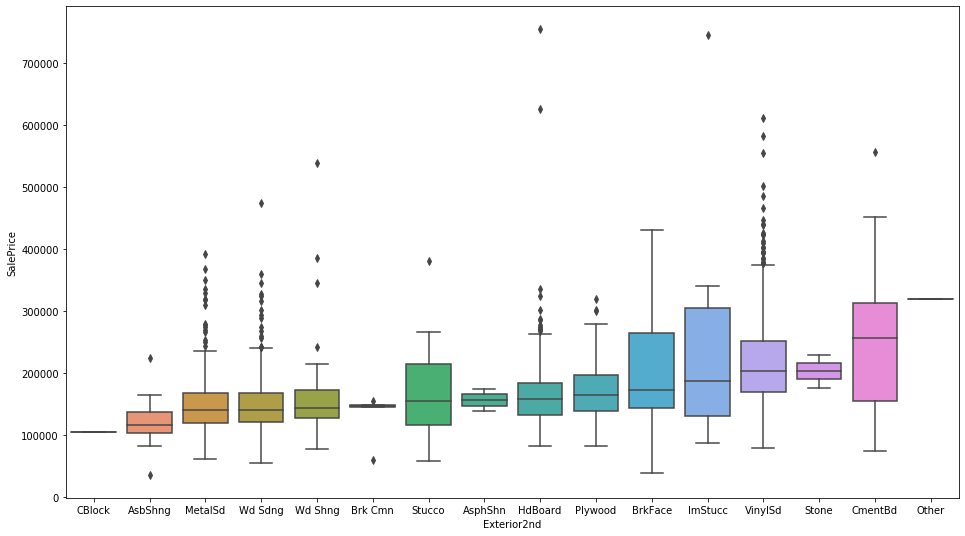

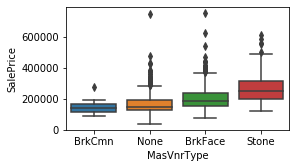

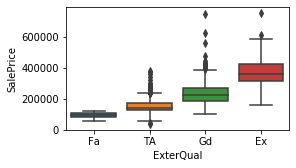

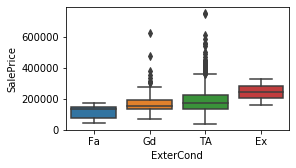

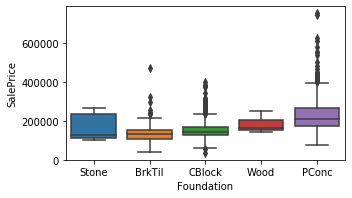

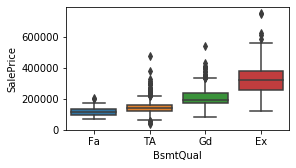

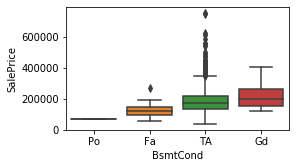

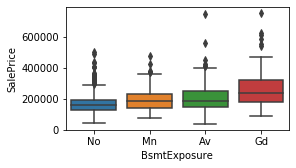

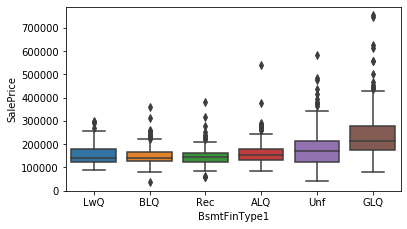

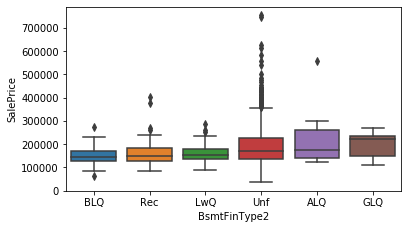

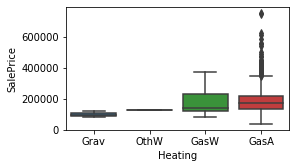

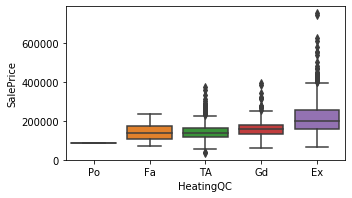

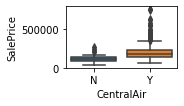

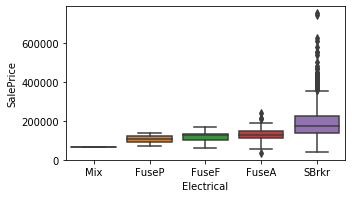

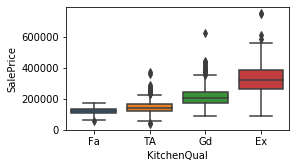

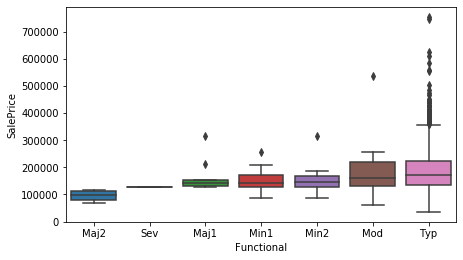

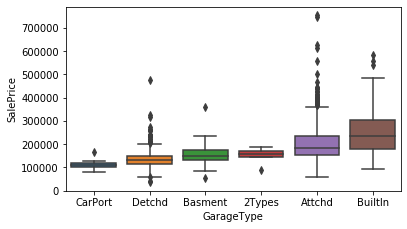

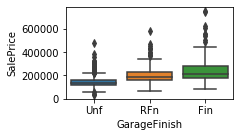

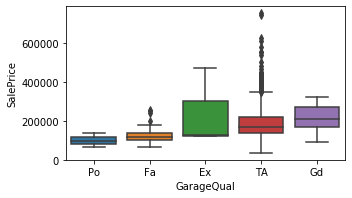

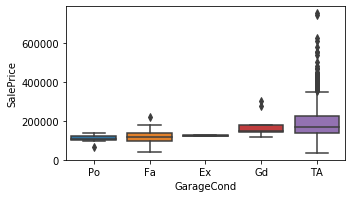

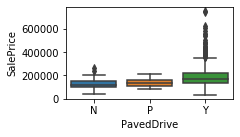

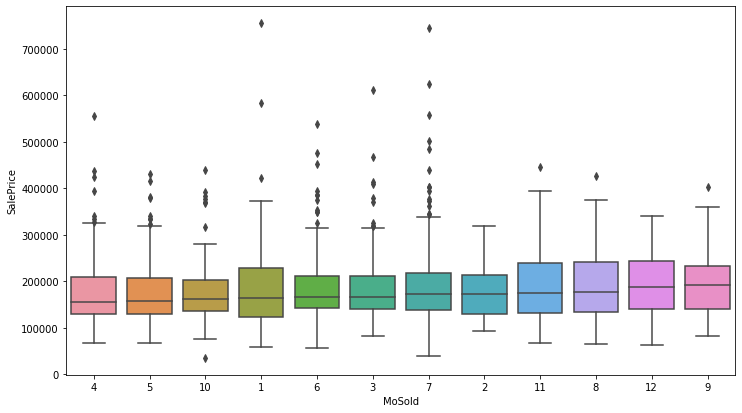

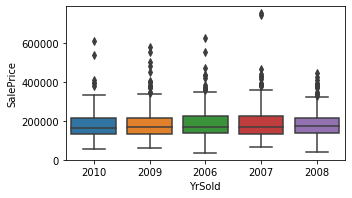

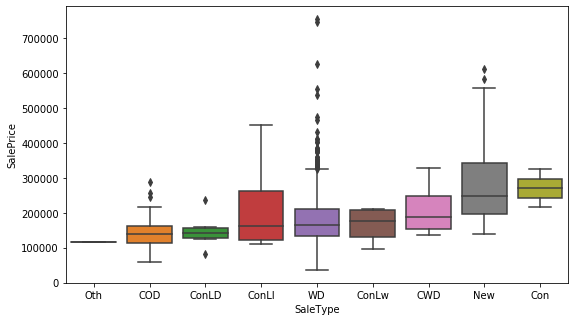

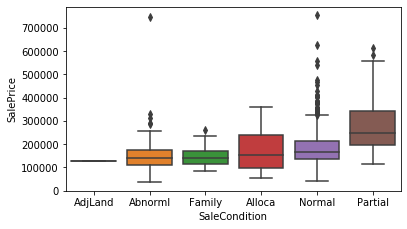

In [24]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, out_col)

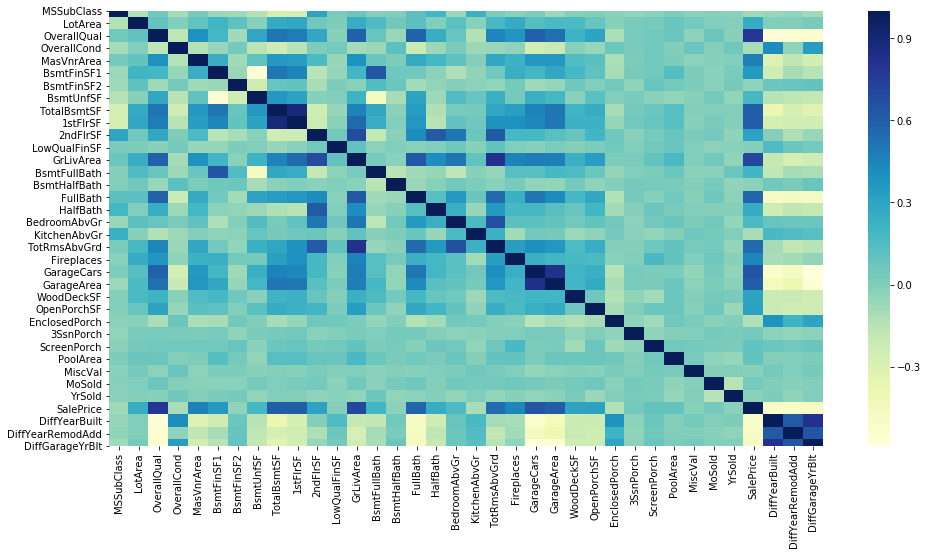

In [25]:
#Plotting heatmap to check coorelation
plt.figure(figsize=(16,8))
sns.heatmap(housing.corr(), cmap="YlGnBu", annot=False)
plt.show()

### Creating Dummy variables for categorical variables

In [26]:
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies=pd.get_dummies(housing[col],drop_first=True)
    # Adding prefix to dummy column names so as to identify it later
    dummies=dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    housing = pd.concat([housing, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    housing.drop([col],axis=1,inplace=True)
    
housing.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,196.0,706,0,150,856,856,854,0,1710,...,0,0,0,0,1,0,0,0,1,0
1,9600,0.0,978,0,284,1262,1262,0,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,11250,162.0,486,0,434,920,920,866,0,1786,...,0,0,0,0,1,0,0,0,1,0
3,9550,0.0,216,0,540,756,961,756,0,1717,...,0,0,0,0,1,0,0,0,0,0
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,...,0,0,0,0,1,0,0,0,1,0


### Step 5 : Train Test Split and Feature Scaling for modelling

In [27]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(housing[num_col]))
# Outlier Removed Records
selected = housing[num_col][(z < 3).all(axis=1)]
housing = housing.loc[selected.index]
housing

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,196.0,706,0,150,856,856,854,0,1710,...,0,0,0,0,1,0,0,0,1,0
2,11250,162.0,486,0,434,920,920,866,0,1786,...,0,0,0,0,1,0,0,0,1,0
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,...,0,0,0,0,1,0,0,0,1,0
6,10084,186.0,1369,0,317,1686,1694,0,0,1694,...,0,0,0,0,1,0,0,0,1,0
10,11200,0.0,906,0,134,1040,1040,0,0,1040,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,9262,194.0,0,0,1573,1573,1578,0,0,1578,...,0,0,1,0,0,0,0,0,0,1
1452,3675,80.0,547,0,0,547,1072,0,0,1072,...,0,0,0,0,1,0,0,0,1,0
1454,7500,0.0,410,0,811,1221,1221,0,0,1221,...,0,0,0,0,1,0,0,0,1,0
1455,7917,0.0,0,0,953,953,953,694,0,1647,...,0,0,0,0,1,0,0,0,1,0


In [28]:
#Another way to do train Test Split
#df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=42)

#y_train = df_train.pop('SalePrice')
#X_train = df_train

#y_test = df_test.pop('SalePrice')
#X_test = df_test

In [29]:
# Putting response variable to y
y=housing.loc[:,out_col]
X=housing.loc[:,housing.columns != out_col]

In [30]:
#Splitting the data into Train-Test Set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

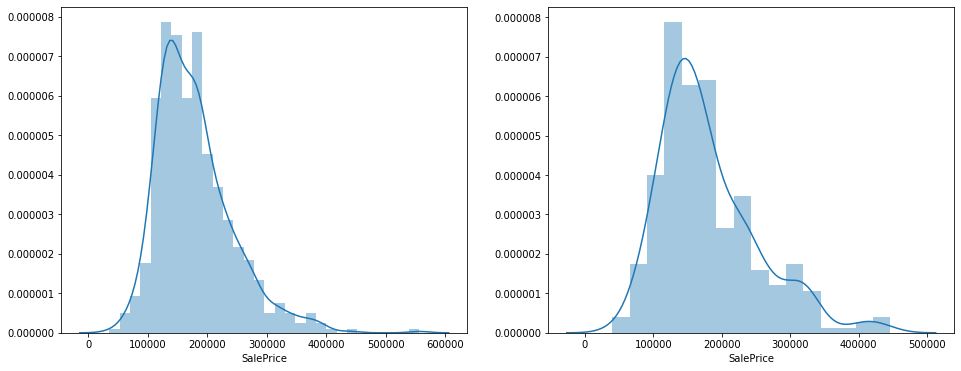

In [32]:
#Lets check our target variable after train-test split

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(y_train)

plt.subplot(1,2,2)
sns.distplot(y_test)
plt.show()

### Step5: Modelling and Evaluation

**Performing Simple Linear Regression**

In [33]:
#Lets perform linear regession with all features
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#predict train
y_train_pred=lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

0.9471599809865531


In [35]:
#predict test
y_test_pred=lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

-3.718997137184609e+21


In [36]:
# Simple Linear Regression model parameters
model_params=list(lm.coef_)
model_params.insert(0,lm.intercept_)
model_params=[round(x,3) for x in model_params]
cols=X.columns
cols=cols.insert(0,"constant")
sorted(list(zip(model_params,cols)), key=lambda x:abs(x[0]), reverse=True)

[(3.877243572391527e+16, 'BsmtUnfSF'),
 (3.662771898943829e+16, 'BsmtFinSF1'),
 (-3.1042562425630936e+16, 'TotalBsmtSF'),
 (8080792207447368.0, 'GrLivArea'),
 (-7754201324903236.0, '2ndFlrSF'),
 (7701519945912706.0, 'BsmtFinSF2'),
 (7101646339731823.0, 'constant'),
 (-6274544016511164.0, '1stFlrSF'),
 (5546566506838626.0, 'BsmtHalfBath'),
 (5199278677838626.0, 'MSSubClass_40'),
 (4084276268447085.5, 'PoolArea'),
 (-3636652725069018.5, 'GarageType_Attchd'),
 (-3636652725065078.5, 'GarageType_Detchd'),
 (-3636652725064078.5, 'GarageType_BuiltIn'),
 (-3636652725060292.0, 'GarageType_Basment'),
 (3262525478747395.5, '3SsnPorch'),
 (-2650593992919581.0, 'MSSubClass_190'),
 (-2650593992899887.5, 'Street_Pave'),
 (2650593992896771.0, 'BldgType_2fmCon'),
 (-2650593992893331.0, 'ExterQual_Fa'),
 (1565765634824424.8, 'Exterior2nd_CBlock'),
 (1274343815185077.5, 'GarageCond_Po'),
 (1189885396461463.2, 'KitchenAbvGr'),
 (1167098973632778.0, 'OverallCond_8'),
 (1167098973629431.5, 'OverallCond_9'),

**Performing Ridge Regression**

In [37]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)
#folds=5
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    5.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.024879,0.008865,0.004463,0.004795,0.0001,{'alpha': 0.0001},-13979.626058,-15167.830525,-18868.824028,-20372.691398,...,-9087.329538,-9458.923483,-9616.977080,-9438.323388,-9428.567122,-9455.762296,-9256.872009,-9783.099758,-9499.843129,211.530684
1,0.014062,0.008412,0.003125,0.006249,0.001,{'alpha': 0.001},-13941.955068,-15167.421015,-18809.099796,-20243.648202,...,-9089.464207,-9461.297004,-9616.870279,-9439.341417,-9427.337770,-9457.598332,-9258.711876,-9783.406312,-9500.951998,211.194514
2,0.013849,0.007568,0.001762,0.004659,0.01,{'alpha': 0.01},-13694.451166,-15156.144619,-18356.560875,-19366.660162,...,-9108.466626,-9484.833226,-9616.355167,-9448.428420,-9429.851159,-9472.582772,-9269.051071,-9787.324606,-9511.835147,208.754283
3,0.013779,0.004846,0.003525,0.006100,0.05,{'alpha': 0.05},-13357.315789,-15113.010650,-17524.029501,-18064.977397,...,-9167.348688,-9557.520795,-9629.070358,-9493.965538,-9459.818160,-9521.693003,-9292.145962,-9820.931731,-9549.755577,202.455625
4,0.014062,0.004687,0.000000,0.000000,0.1,{'alpha': 0.1},-13213.752084,-15066.008918,-17129.573333,-17482.623811,...,-9212.329062,-9611.575747,-9653.162685,-9554.905973,-9498.328847,-9559.691953,-9313.312099,-9847.769839,-9584.990877,197.868944


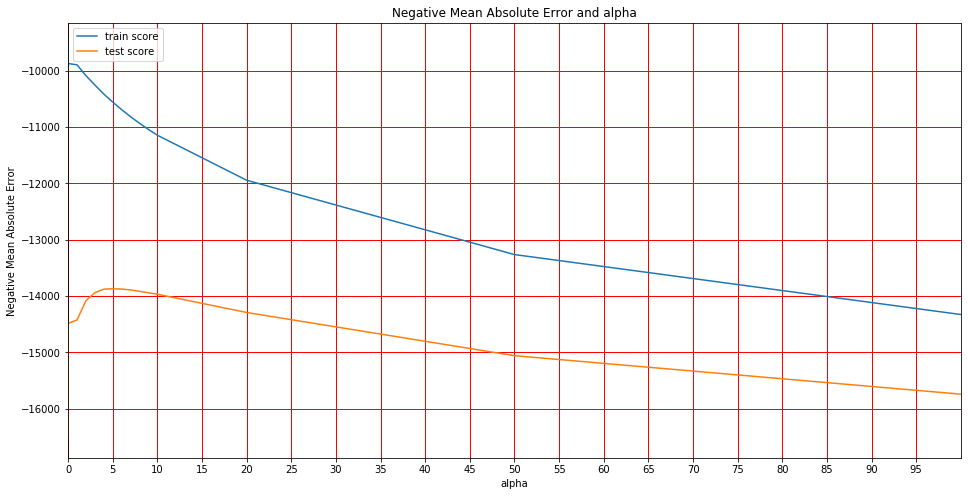

In [39]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [40]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

In [41]:
# From the above plot we can take alpha=4
alpha=5
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

#predict
y_train_pred=ridge.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred_ridge=ridge.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred_ridge))

0.9376505436070786
0.937100596326294


In [42]:

# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ridge_coef = pd.DataFrame(list(zip(cols,model_parameters)))
ridge_coef.columns = ['Feaure','Coef']

In [43]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,constant,167059.293
84,Neighborhood_StoneBr,25734.875
119,OverallQual_9,24293.559
220,Functional_Typ,16736.122
68,Neighborhood_Crawfor,15956.274
10,GrLivArea,13020.914
187,BsmtExposure_Gd,12406.650
265,SaleCondition_Partial,12098.205
78,Neighborhood_NridgHt,11669.389
120,OverallQual_10,10073.051


**Performing Lasso Regression**

In [44]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)
#folds=5
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  1.0min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.242475,0.008393,0.000300,0.000900,0.0001,{'alpha': 0.0001},-13595.801279,-16024.899664,-18203.824496,-19849.893983,...,-9109.215222,-9477.079655,-9614.133464,-9450.660829,-9439.664646,-9469.861429,-9272.323183,-9789.487300,-9513.011722,208.877230
1,0.255489,0.034209,0.000360,0.001080,0.001,{'alpha': 0.001},-13595.671909,-16021.034074,-18204.673577,-19841.949726,...,-9109.234572,-9477.082100,-9614.127930,-9450.661719,-9439.658633,-9469.872164,-9272.320889,-9789.484634,-9513.014796,208.874761
2,0.226840,0.010560,0.004686,0.007158,0.01,{'alpha': 0.01},-13594.327647,-15979.997535,-18216.487152,-19759.995196,...,-9109.539492,-9477.203111,-9614.115918,-9450.790438,-9439.694399,-9470.044293,-9272.239477,-9789.493037,-9513.101727,208.837786
3,0.247849,0.019760,0.000000,0.000000,0.05,{'alpha': 0.05},-13587.749290,-15571.984922,-18205.240539,-19362.212216,...,-9110.795907,-9478.199725,-9614.228031,-9451.440566,-9440.068339,-9471.133190,-9272.448233,-9789.613670,-9513.713875,208.675457
4,0.249507,0.023871,0.006250,0.007655,0.1,{'alpha': 0.1},-13579.313747,-15452.332006,-18180.711632,-19055.049566,...,-9112.712214,-9480.374183,-9614.665784,-9452.271721,-9440.558174,-9472.933083,-9272.835003,-9790.128556,-9514.742553,208.439793


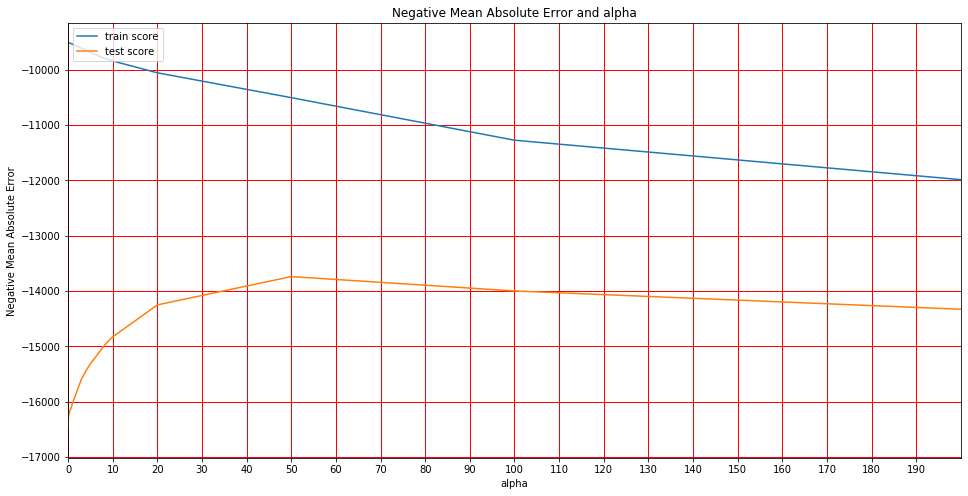

In [46]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [47]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 50}

In [48]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9386722124802906
0.9369584585495776


In [49]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(162413.855, 'constant'),
 (38576.405, 'OverallQual_9'),
 (38547.194, 'Neighborhood_StoneBr'),
 (30897.672, 'OverallQual_10'),
 (24853.673, 'Neighborhood_Crawfor'),
 (22694.062, 'SaleCondition_Partial'),
 (-22319.718, 'Functional_Mod'),
 (-22196.592, 'OverallCond_3'),
 (-21058.195, 'SaleCondition_Alloca'),
 (19640.456, 'GrLivArea'),
 (17280.993, 'Functional_Typ'),
 (15690.751, 'OverallQual_8'),
 (15359.888, 'Neighborhood_NridgHt'),
 (14408.876, 'BsmtExposure_Gd'),
 (-13863.904, 'MSSubClass_160'),
 (-12927.535, 'KitchenQual_Gd'),
 (-12067.241, 'KitchenQual_TA'),
 (-11933.602, 'KitchenQual_Fa'),
 (-11895.343, 'BsmtQual_TA'),
 (11751.728, 'MSZoning_FV'),
 (-11665.574, 'MSSubClass_90'),
 (-11177.558, 'BsmtQual_Gd'),
 (-10899.047, 'DiffYearBuilt'),
 (-9861.081, 'Condition1_RRAe'),
 (-9785.922, 'OverallCond_5'),
 (-9638.83, 'Neighborhood_MeadowV'),
 (9552.575, 'Exterior1st_BrkFace'),
 (-9366.397, 'OverallQual_4'),
 (9332.543, 'TotalBsmtSF'),
 (9269.998, 'Neighborhood_NoRidge'),
 (-8913.018,

In [50]:
#lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
#lasso_coef.columns = ['Featuere','Coef']

In [51]:
#lasso_coef.sort_values(by='Coef',ascending=False).head(10)

**Automated selection of Predictors (RFE)**

In [52]:
# Running RFE with the output number of the variable equal to 30
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotArea', False, 140),
 ('MasVnrArea', False, 219),
 ('BsmtFinSF1', False, 54),
 ('BsmtFinSF2', False, 56),
 ('BsmtUnfSF', False, 55),
 ('TotalBsmtSF', False, 45),
 ('1stFlrSF', False, 30),
 ('2ndFlrSF', False, 29),
 ('LowQualFinSF', False, 31),
 ('GrLivArea', False, 28),
 ('BsmtFullBath', False, 234),
 ('BsmtHalfBath', False, 27),
 ('FullBath', False, 220),
 ('HalfBath', False, 226),
 ('BedroomAbvGr', False, 194),
 ('KitchenAbvGr', False, 26),
 ('TotRmsAbvGrd', False, 185),
 ('Fireplaces', False, 202),
 ('GarageCars', False, 180),
 ('GarageArea', False, 195),
 ('WoodDeckSF', False, 190),
 ('OpenPorchSF', False, 196),
 ('EnclosedPorch', False, 233),
 ('3SsnPorch', False, 25),
 ('ScreenPorch', False, 191),
 ('PoolArea', False, 24),
 ('MiscVal', False, 206),
 ('DiffYearBuilt', False, 80),
 ('DiffYearRemodAdd', False, 231),
 ('DiffGarageYrBlt', False, 179),
 ('MSSubClass_30', False, 192),
 ('MSSubClass_40', False, 47),
 ('MSSubClass_45', False, 23),
 ('MSSubClass_50', False, 144),
 ('M

In [54]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofMatl_Tar&Grv', 'Exterior2nd_CBlock', 'BsmtCond_Po', 'Heating_Grav',
       'Electrical_Mix', 'Functional_Maj2', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA'],
      dtype='object')

In [55]:
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [56]:
# MODEL 1
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(housing[auto_selected_predictors]))

Parameters obtained for ['OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'Exterior2nd_CBlock', 'BsmtCond_Po', 'Heating_Grav', 'Electrical_Mix', 'Functional_Maj2', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA']
const                 105334.188958
OverallCond_3         -21656.685298
OverallCond_4          -6735.341767
OverallCond_5          43860.650037
OverallCond_6          12890.013524
OverallCond_7          17222.341515
OverallCond_8          25017.241301
OverallCond_9          27499.112255
RoofStyle_Gable        -1423.169839
RoofStyle_Gambrel      51247.858258
RoofStyle_Hip          21702.676094
RoofStyle_Mansard      15448

In [57]:
# MODEL 2
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(housing[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Mod', 'OverallCond_3', 'SaleCondition_Alloca', 'GrLivArea', 'Functional_Typ', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'MSSubClass_90', 'BsmtQual_Gd', 'DiffYearBuilt', 'Condition1_RRAe', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'OverallQual_4', 'TotalBsmtSF', 'Neighborhood_NoRidge', 'LandContour_Low']
const                    195194.819699
OverallQual_9             50310.869327
Neighborhood_StoneBr      40599.257425
OverallQual_10            58723.760693
Neighborhood_Crawfor      36830.340177
SaleCondition_Partial     15589.642394
Functional_Mod           -30183.410866
OverallCond_3            -33317.709164
SaleCondition_Alloca     -43668.801763
GrLivArea                 27167.964995
Functional_Typ    

In [58]:
# MODEL 3
# We got better VIF values with the features selected by Lasso, hence refining the model based on KPIs.
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(housing[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Mod', 'OverallCond_3', 'SaleCondition_Alloca', 'GrLivArea', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'MSSubClass_90', 'BsmtQual_Gd', 'DiffYearBuilt', 'Condition1_RRAe', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'OverallQual_4', 'TotalBsmtSF', 'Neighborhood_NoRidge', 'LandContour_Low']
const                    212378.750367
OverallQual_9             52309.575639
Neighborhood_StoneBr      40113.654492
OverallQual_10            59892.785078
Neighborhood_Crawfor      37957.500584
SaleCondition_Partial     15843.522471
Functional_Mod           -45070.863578
OverallCond_3            -34514.029227
SaleCondition_Alloca     -41998.113927
GrLivArea                 26368.341938
OverallQual_8             22132.3029

In [59]:
# MODEL 4
lasso_selected_features.remove('Functional_Mod')
make_lr_model_mp(list(housing[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'GrLivArea', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'MSSubClass_90', 'BsmtQual_Gd', 'DiffYearBuilt', 'Condition1_RRAe', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'OverallQual_4', 'TotalBsmtSF', 'Neighborhood_NoRidge', 'LandContour_Low']
const                    212447.566249
OverallQual_9             52944.822460
Neighborhood_StoneBr      40470.337101
OverallQual_10            60317.661360
Neighborhood_Crawfor      38241.086005
SaleCondition_Partial     15991.240616
OverallCond_3            -40587.864239
SaleCondition_Alloca     -42259.321528
GrLivArea                 26061.626817
OverallQual_8             22685.890125
Neighborhood_NridgHt      21216.175700
BsmtExposure_Gd

In [60]:
# MODEL 5
lasso_selected_features.remove('KitchenQual_TA')
make_lr_model_mp(list(housing[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'GrLivArea', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'MSSubClass_90', 'BsmtQual_Gd', 'DiffYearBuilt', 'Condition1_RRAe', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'OverallQual_4', 'TotalBsmtSF', 'Neighborhood_NoRidge', 'LandContour_Low']
const                    189346.088193
OverallQual_9             70881.573941
Neighborhood_StoneBr      40345.477924
OverallQual_10            80457.585288
Neighborhood_Crawfor      38579.053402
SaleCondition_Partial     17665.765272
OverallCond_3            -41481.536335
SaleCondition_Alloca     -42971.258056
GrLivArea                 26795.435004
OverallQual_8             25407.903838
Neighborhood_NridgHt      22630.414033
BsmtExposure_Gd           21349.5

In [61]:
# MODEL 6
lasso_selected_features.remove('KitchenQual_Fa')
make_lr_model_mp(list(housing[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'GrLivArea', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'BsmtQual_TA', 'MSZoning_FV', 'MSSubClass_90', 'BsmtQual_Gd', 'DiffYearBuilt', 'Condition1_RRAe', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'OverallQual_4', 'TotalBsmtSF', 'Neighborhood_NoRidge', 'LandContour_Low']
const                    189405.960283
OverallQual_9             70832.896520
Neighborhood_StoneBr      40325.718536
OverallQual_10            80417.172202
Neighborhood_Crawfor      38053.584905
SaleCondition_Partial     17643.829580
OverallCond_3            -41343.937884
SaleCondition_Alloca     -44701.767651
GrLivArea                 26822.590344
OverallQual_8             25364.293331
Neighborhood_NridgHt      22601.919606
BsmtExposure_Gd           21340.674515
MSSubClass_1

In [62]:
# MODEL 7
lasso_selected_features.remove('LandContour_Low')
make_lr_model_mp(list(housing[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'GrLivArea', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'BsmtQual_TA', 'MSZoning_FV', 'MSSubClass_90', 'BsmtQual_Gd', 'DiffYearBuilt', 'Condition1_RRAe', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'OverallQual_4', 'TotalBsmtSF', 'Neighborhood_NoRidge']
const                    189220.683066
OverallQual_9             71309.667465
Neighborhood_StoneBr      39654.656373
OverallQual_10            80578.060964
Neighborhood_Crawfor      38082.155911
SaleCondition_Partial     17798.549059
OverallCond_3            -41300.552832
SaleCondition_Alloca     -44635.144608
GrLivArea                 26830.819968
OverallQual_8             25628.223060
Neighborhood_NridgHt      22602.656856
BsmtExposure_Gd           20312.138474
MSSubClass_160           -28020

In [63]:
# MODEL 8
lasso_selected_features.remove('MSSubClass_90')
make_lr_model_mp(list(housing[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'GrLivArea', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'BsmtQual_TA', 'MSZoning_FV', 'BsmtQual_Gd', 'DiffYearBuilt', 'Condition1_RRAe', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'OverallQual_4', 'TotalBsmtSF', 'Neighborhood_NoRidge']
const                    189167.573371
OverallQual_9             71472.658303
Neighborhood_StoneBr      39589.936904
OverallQual_10            80588.213987
Neighborhood_Crawfor      38110.317244
SaleCondition_Partial     17850.614484
OverallCond_3            -41280.858874
SaleCondition_Alloca     -44520.391259
GrLivArea                 26914.100662
OverallQual_8             25701.439551
Neighborhood_NridgHt      22526.639779
BsmtExposure_Gd           19332.737205
MSSubClass_160           -27925.193361
KitchenQu

In [64]:
# MODEL 9
lasso_selected_features.remove('OverallCond_5')
make_lr_model_mp(list(housing[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'GrLivArea', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'BsmtQual_TA', 'MSZoning_FV', 'BsmtQual_Gd', 'DiffYearBuilt', 'Condition1_RRAe', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'OverallQual_4', 'TotalBsmtSF', 'Neighborhood_NoRidge']
const                    180219.129179
OverallQual_9             71746.406178
Neighborhood_StoneBr      39983.106332
OverallQual_10            81777.583640
Neighborhood_Crawfor      38829.571964
SaleCondition_Partial     17432.353995
OverallCond_3            -38147.874209
SaleCondition_Alloca     -46228.954259
GrLivArea                 26791.027475
OverallQual_8             25375.792977
Neighborhood_NridgHt      21862.516802
BsmtExposure_Gd           19595.921988
MSSubClass_160           -28744.977796
KitchenQual_Gd            

**The present model seems fine in terms of p-value and VIF. Adjusted R-square is also 0.733**

In [65]:
# final model parameters
lasso_selected_features

['OverallQual_9',
 'Neighborhood_StoneBr',
 'OverallQual_10',
 'Neighborhood_Crawfor',
 'SaleCondition_Partial',
 'OverallCond_3',
 'SaleCondition_Alloca',
 'GrLivArea',
 'OverallQual_8',
 'Neighborhood_NridgHt',
 'BsmtExposure_Gd',
 'MSSubClass_160',
 'KitchenQual_Gd',
 'BsmtQual_TA',
 'MSZoning_FV',
 'BsmtQual_Gd',
 'DiffYearBuilt',
 'Condition1_RRAe',
 'Neighborhood_MeadowV',
 'Exterior1st_BrkFace',
 'OverallQual_4',
 'TotalBsmtSF',
 'Neighborhood_NoRidge']

### Visualization and Conclusion of final model

Text(0, 0.5, 'Sales Price')

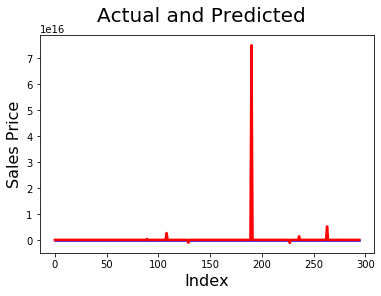

In [66]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

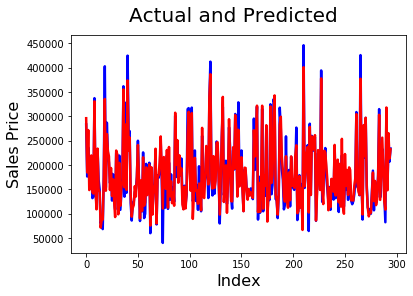

In [67]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

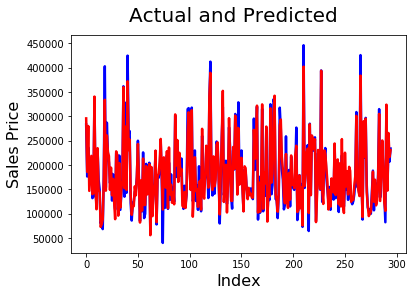

In [68]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

**Conclusion:**

- Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.
- Simple Linear Regression model is fairly complex, hence we would not consider that.
- Ridge Regression model is fairly complex, hence we would not consider that.
- Optimum value of lambda for Ridge Regression is 5.
- Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
- Optimum value of lambda for Lasso Regression is 50.

**Most important 30 features that are affecting Sales pricing are:**

In [69]:
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')

OverallQual_9                           Score: 38576.405
Neighborhood_StoneBr                    Score: 38547.194
OverallQual_10                          Score: 30897.672
Neighborhood_Crawfor                    Score: 24853.673
SaleCondition_Partial                   Score: 22694.062
Functional_Mod                          Score: -22319.718
OverallCond_3                           Score: -22196.592
SaleCondition_Alloca                    Score: -21058.195
GrLivArea                               Score: 19640.456
Functional_Typ                          Score: 17280.993
OverallQual_8                           Score: 15690.751
Neighborhood_NridgHt                    Score: 15359.888
BsmtExposure_Gd                         Score: 14408.876
MSSubClass_160                          Score: -13863.904
KitchenQual_Gd                          Score: -12927.535
KitchenQual_TA                          Score: -12067.241
KitchenQual_Fa                          Score: -11933.602
BsmtQual_TA             

**From our initial set of columns, few of the major influencers for Sales Pricing are:**

1. OverallCond
2. SaleCondition
3. Functional
4. KitchenQual
5. Exterior1st
6. Condition1
7. MSSubClass
8. Neighborhood
9. BsmtExposure
10. MSZoning